# Load all data

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

# load orbital parameters
path='D:/VScode/Last_deglaciation/data_fig3/'
df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')

# Load summer insolation and intergrated summer insolation of 60°S
inso60s=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv')
df_inter_ann=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/df_inter_ann.csv')



# Load the proxy sea ice data
df_proxy_sea_ice = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA.csv')
df_proxy_seaice_pc = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA_pc.csv')

# load the LGMR_sic_area using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_area.pickle', 'rb') as f:
    LGMR_sic_area = pickle.load(f)

# # Load LGMR SAT and SIC data
# data_dir = 'D:/VScode/Last_deglaciation/data'
# ds_sat_EOFs_MC = xr.open_dataset(data_dir + '/ds_sat_EOFs_MC.nc')
    
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')

path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'
ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=11000, drop=True)




# sat of the 50 to 70°S
# read the weighted_avg_sat_mean
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_mean.pickle', 'rb') as f:
    weighted_avg_sat_mean = pickle.load(f)
    
# read the weighted_avg_sat_ens using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_ens.pickle', 'rb') as f:
    weighted_avg_sat_ens = pickle.load(f)


# sat of the class 0
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

time_of_class0=ds_sat['age'].values


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


# load TraCE data
path='D:/VScode/Last_deglaciation/data_fig3/'
trace_age=np.load(path+'trace_age.npy')
sat_series_orb=np.load(path+'sat_series_orb.npy')
sat_series_ghg=np.load(path+'sat_series_ghg.npy')
sat_series_allforcing=np.load(path+'sat_series_allforcing.npy')
smoothed_sat_orb=np.load(path+'smoothed_sat_orb.npy')
smoothed_sat_ghg=np.load(path+'smoothed_sat_ghg.npy')
smoothed_sat_allforcing=np.load(path+'smoothed_sat_allforcing.npy')

# read the asice_trace_orb using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_orb.pickle', 'rb') as f:
    asice_trace_orb=pickle.load(f)

# read the asice_trace_allforcing using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_allforcing.pickle', 'rb') as f:
    asice_trace_allforcing=pickle.load(f)


path='D:/VScode/Last_deglaciation/EBM_data/'

# Load the EBM results
# read the df_full_orbital.csv
df_full_orbital_EBM=pd.read_csv(path+'df_full_orbital_EBM.csv')
# read the df_obl.csv
df_obl_EBM=pd.read_csv(path+'df_obl_EBM.csv')
# read the df_pre_EBM.csv
df_pre_EBM=pd.read_csv(path+'df_pre_EBM.csv')
# read the df_GHG_EBM.csv
df_all_forcing_EBM=pd.read_csv(path+'df_all_forcing_EBM.csv')


ebm_list=[df_all_forcing_EBM,df_full_orbital_EBM, df_obl_EBM, df_pre_EBM]



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [20]:
import numpy as np

sad_PIPSO25 = np.array([
    [0.36, 0.173],
    [1.35, 0.250],
    [1.35, 0.241],
    [2.24, 0.355],
    [3.11, 0.358],
    [3.99, np.nan],
    [4.54, 0.000],
    [4.89, 0.000],
    [5.77, np.nan],
    [6.69, 0.396],
    [7.57, np.nan],
    [8.63, np.nan],
    [9.48, np.nan],
    [9.64, np.nan],
    [10.13, 0.187],
    [10.29, 0.000],
    [10.64, 0.240],
    [10.81, 0.176],
    [11.29, 0.000],
    [11.47, 0.000],
    [12.25, 0.000],
    [13.05, 0.104],
    [13.58, 0.000],
    [13.85, 0.082],
    [14.46, 0.143],
    [14.46, 0.204],
    [14.82, 0.000],
    [15.40, np.nan],
    [15.94, 0.000],
    [16.42, 0.000],
    [16.97, 0.216],
    [17.80, 0.357],
    [18.44, 0.311],
    [18.94, 0.327],
    [19.47, 0.450],
    [20.00, 0.517],
    [20.56, 0.459],
    [21.11, 0.900],
    [21.64, 0.675],
    [22.16, 0.782],
    [22.64, 0.827],
    [23.21, 0.911],
    [24.24, 0.544],
    [25.26, 0.854],
    [25.26, 0.816],
    [26.25, 0.866],
    [27.41, 1.000],
    [28.80, 1.000],
    [29.79, 0.699],
    [30.73, 0.643],
    [31.75, np.nan],
    [32.75, 0.663],
    [33.77, 0.565],
    [34.76, 0.661],
    [35.77, 0.607],
    [36.76, 0.611],
    [38.49, 1.000],
    [39.74, 0.873]
])
# remove rows with nan
sad_PIPSO25 = sad_PIPSO25[~np.isnan(sad_PIPSO25).any(axis=1)]

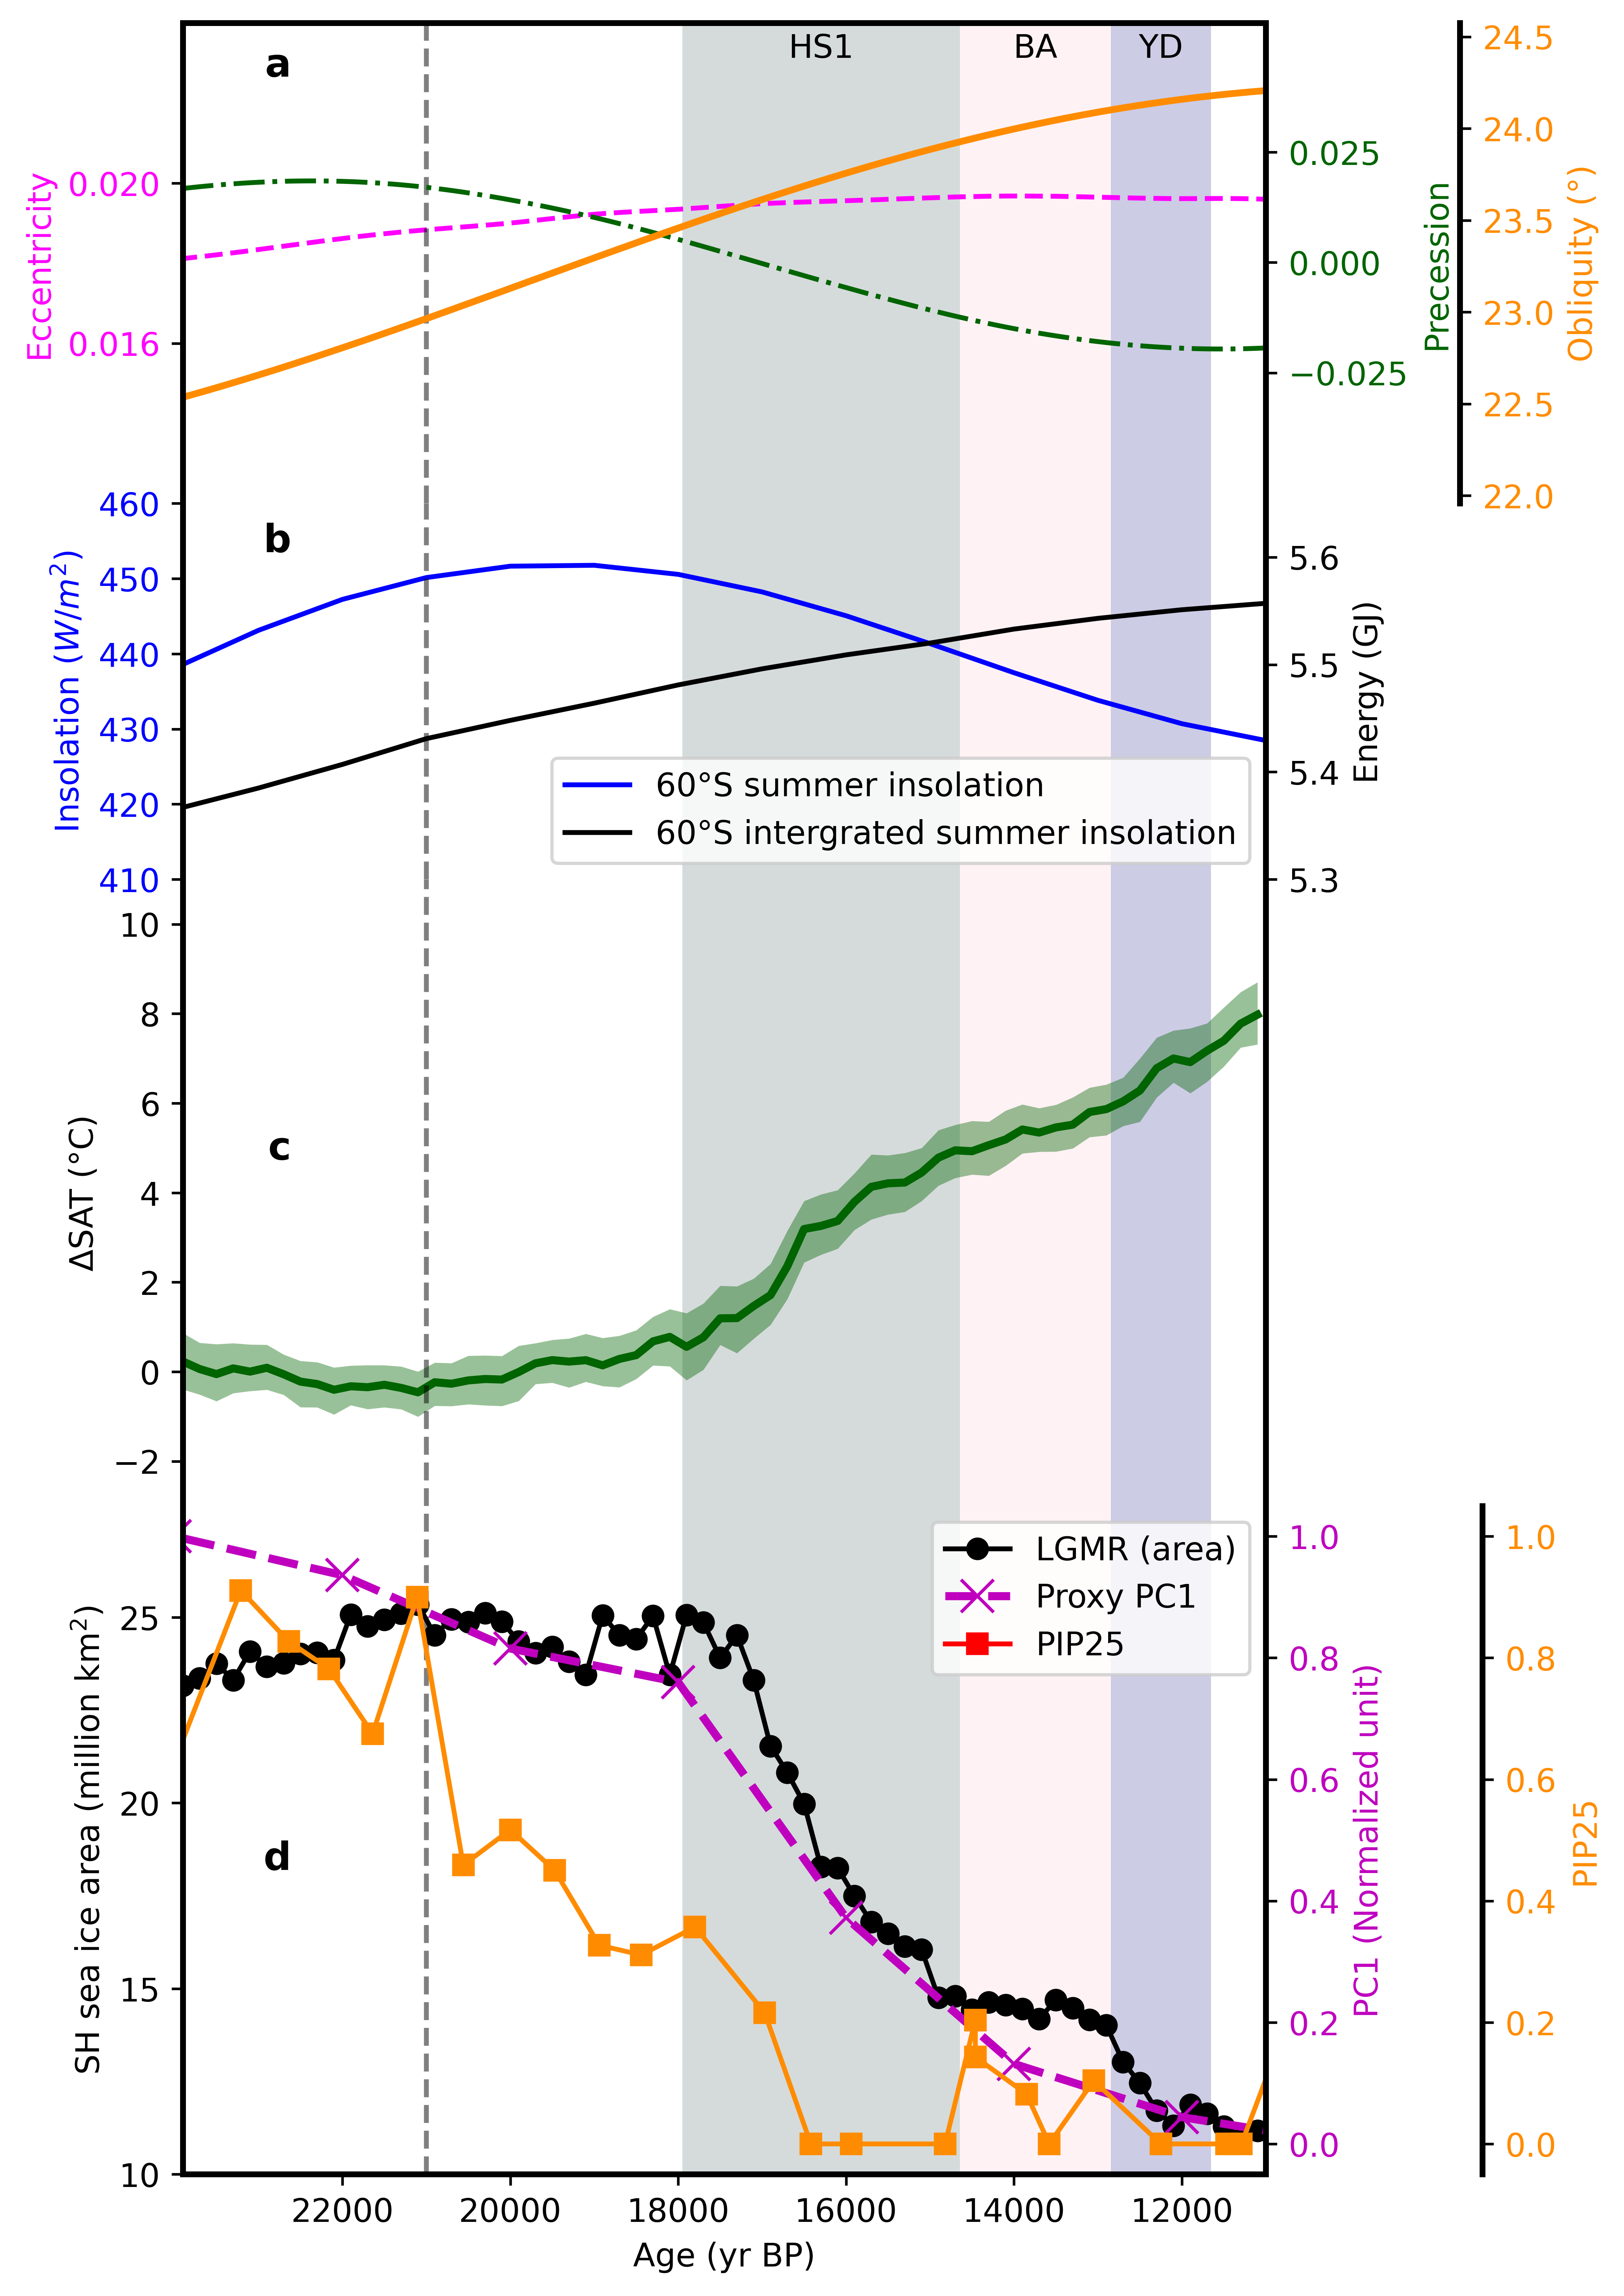

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from scipy.stats import zscore



# Periods for the vertical grey bars
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

# Define the grey color with a transparency using RGBA tuple
grey_color = (0.8, 0.8, 0.8, 0.5)  # Grey color with 50% transparency.

# Function to add grey bars to the subplots
def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)


# sic_colors = {
#     '0-60': 'brown',      
#     '60-120': 'blue', 
#     '120-180': 'blueviolet', 
#     '180-240': 'green',  
#     '240-300': 'olive',   
#     '300-360': 'darkorange',    
# }

EBM_marker=['o','^','s']
EBM_label=['EBM, obliquity only','EBM, orbital','EBM, precession only']
EBM_line=['-','--',':']


# fig, axs = plt.subplots(4, 1, figsize=(6, 10), dpi=600,sharex=True)
fig, axs = plt.subplots(4, 1, figsize=(6, 12), dpi=600, sharex=True, 
                        gridspec_kw={'height_ratios': [2.3, 1.8, 3, 3.2]})


# First subplot for orbital parameters with three y-axes
ax0 = axs[0]

# Plot Eccentricity
ax0.plot(df_ecc['age'], df_ecc['ecc'], color='magenta', label='Eccentricity', linestyle='--')
ax0.set_ylabel('Eccentricity', color='magenta')
# set y axis limit
ax0.set_ylim(0.012, 0.024)
# set y ticks
ax0.set_yticks([0.016, 0.02])
ax0.tick_params(axis='y', labelcolor='magenta')
ax0.spines['bottom'].set_visible(False)

ax0.text(x=np.mean(HS1), y=0.99 * np.max(ax0.get_ylim()), s='HS1', ha='center', va='top')
ax0.text(x=np.mean(BA), y=0.99 * np.max(ax0.get_ylim()), s='BA', ha='center', va='top')
ax0.text(x=np.mean(YD), y=0.99 * np.max(ax0.get_ylim()), s='YD', ha='center', va='top')

# Create first twin axis for Precession
ax0_1 = ax0.twinx()
ax0_1.plot(df_pre['age'], df_pre['pre'], color='darkgreen', label='Precession', linestyle='-.')
ax0_1.set_ylabel('Precession', color='darkgreen')
ax0_1.tick_params(axis='y', labelcolor='darkgreen')
# set ytick label to be '-0.025', '0', and '0.025'
ax0_1.set_yticks([-0.025, 0, 0.025])
# show y axis and ticks on the right
ax0_1.yaxis.tick_right()
ax0_1.yaxis.set_label_position("right")
ax0_1.spines['bottom'].set_visible(False)

# Create second twin axis for Obliquity, positioned on the right
# plot obl data in dark blue
ax0_2 = ax0.twinx()
ax0_2.plot(df_obl['age'], df_obl['obl'].values*180/np.pi, color='darkorange', label='Obliquity',linewidth=2.1)
ax0_2.set_ylabel('Obliquity (°)', color='darkorange')
ax0_2.tick_params(axis='y', labelcolor='darkorange')
# set the line width of the y axis to 1.8
ax0_2.spines['right'].set_linewidth(1.8)

# Adjust the position of the second twin axis
ax0_2.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax0_2
ax0_2.spines['bottom'].set_visible(False)









ax1 = axs[1]

# ax1.plot(inso60s['age'], inso60s['insolation'], color='blue', label='inso60s insolation')
ax1.plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['60S summer inso (21 Dec to 21 Feb)'], color='blue',label='60°S summer insolation')
ax1.plot(0,0, color='k', label='60°S intergrated summer insolation')
# set y axis limit
ax1.set_ylim(410, 460)
ax1.set_ylabel('Insolation ($W/m^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower right')

ax2 = ax1.twinx()
ax2.plot(df_inter_ann['age'], df_inter_ann['275'], color='k', label='df_inter_ann data')

# set y axis limit
ax2.set_ylim(5.3, 5.65)
ax2.set_ylabel('Energy (GJ)', color='k')
ax2.tick_params(axis='y', labelcolor='k')
# set x axis limit
ax1.set_xlim(23900,11000)

# remove box
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# remove xticks
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)





# calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
# weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
# weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

# calculate the median of the weighted_avg_curves_k
weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)
axs[2].fill_between(time_of_class0,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color='darkgreen',alpha=0.4,linewidth=0)
axs[2].plot(time_of_class0, weighted_avg_curves_k_median, color='darkgreen',linewidth=2.5, label='LGMR Class 1')

# df_all_forcing_EBM_21=df_all_forcing_EBM['SAT (50 to 70S)'][df_all_forcing_EBM['age']==21000].values
# axs[2].plot(df_all_forcing_EBM['age'], df_all_forcing_EBM['SAT (50 to 70S)'].values-df_all_forcing_EBM_21, color='k',linestyle='-',marker='s',label='EBM, All forcing, 50 to 70°S')


# df_full_orbital_EBM_21=df_full_orbital_EBM['SAT (50 to 70S)'][df_full_orbital_EBM['age']==21000].values
# axs[2].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['SAT (50 to 70S)'].values-df_full_orbital_EBM_21, color='k',linestyle='-',marker='s',label='EBM, All forcing, 50 to 70°S')

# axs[2].legend(loc='upper left')
axs[2].set_ylabel('ΔSAT (°C)')
axs[2].set_xlim(23900,11000)
axs[2].set_ylim(-3, 11)
# axs[2].legend(loc='upper left')
# set y axis limit
# axs[1].set_ylim(-12, 3)
# remove boxes
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].spines['right'].set_visible(False)
# remove xticks
axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)






# Plot the sea ice area
#####################################################################################
# axs3=axs[3]
# axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o')
# axs3.plot(0,0,color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy PC1')

# axs3.set_ylim(10, 28)
# # set y tick labels
# axs3.set_yticks([10, 15, 20, 25])
# axs3.set_xlabel('Age (yr BP)')  # corrected from axs[3].xlabel
# axs3.set_ylabel('SH sea ice area (million km$^2$)')
# axs3.legend(loc='upper right')


# def min_max_scaling(array):
#     min_val = np.min(array)
#     max_val = np.max(array)
#     scaled_array = (array - min_val) / (max_val - min_val)
#     return scaled_array

# # get the df_proxy_seaice_pc data younger than 30 ka
# df_proxy_seaice_pc_younger=df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)']<30]

# ax3_2 = axs3.twinx()

# ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values), color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy')
# ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
# ax3_2.tick_params(axis='y', labelcolor='m')
# ax3_2.spines['top'].set_visible(False)
# ax3_2.spines['bottom'].set_visible(False)

# # add a axis
# ax3_3 = axs3.twinx()
# ax3_3.spines['top'].set_visible(False)
# ax3_3.spines['bottom'].set_visible(False)
# ax3_3.plot(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], color='r', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='PIP25')


# # remove boxes
# axs[3].spines['top'].set_visible(False)
# axs[3].spines['right'].set_visible(False)  
# axs[3].spines['bottom'].set_visible(False)
# axs[3].spines['left'].set_visible(False)

# # remove xticks
# axs[3].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
##############################################################################################

axs3 = axs[3]
axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o')
axs3.plot(0, 0, color='m', marker='x', markersize=10, linewidth=2.5, linestyle='--', label='Proxy PC1')
axs3.plot(0, 0, color='r', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIP25')

axs3.set_ylim(10, 28)
axs3.set_yticks([10, 15, 20, 25])
axs3.set_xlabel('Age (yr BP)')
axs3.set_ylabel('SH sea ice area (million km$^2$)')
axs3.legend(loc='upper right')

def min_max_scaling(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

# Proxy data handling
df_proxy_seaice_pc_younger = df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)'] < 30]

# Adding right y-axis for the first set of additional data
ax3_2 = axs3.twinx()
ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values), 
           color='m', marker='x', markersize=10, linewidth=2.5, linestyle='--', label='Proxy PC1 (Normalized)')
ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
ax3_2.tick_params(axis='y', labelcolor='m')
ax3_2.spines['top'].set_visible(False)

# Adding second right y-axis for sad_PIPSO25 data
ax3_3 = axs3.twinx()
ax3_3.spines['top'].set_visible(False)
# Shift the third axis to the right
ax3_3.spines["right"].set_position(("axes", 1.2))
ax3_3.plot(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], color='darkorange', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIP25')
ax3_3.set_ylabel('PIP25', color='darkorange')
ax3_3.tick_params(axis='y', labelcolor='darkorange')
ax3_3.spines['right'].set_linewidth(1.8)

axs3.spines['top'].set_visible(False)
axs3.spines['right'].set_visible(False)  
axs3.spines['bottom'].set_visible(False)
axs3.spines['left'].set_visible(False)
axs3.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

#######################################################################################################


# Label for subplots
axs[0].text(0.1, 0.95, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[1].text(0.1, 0.95, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[2].text(0.1, 0.6, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[3].text(0.1, 0.5, 'd', transform=axs[3].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
# axs[4].text(0.1, 0.5, 'e', transform=axs[4].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')


# Get the coordinates for the axes
top = axs[0].get_position().y1
bottom = axs[-1].get_position().y0
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

for ax in axs:
    add_grey_bars(ax)
    ax.axvline(x=21000, color='k', linestyle='--', alpha=0.5)


# adjust vertical space between subplots
fig.subplots_adjust(hspace=0)



# Show plot
plt.show()



